### Import library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Read Csv

In [2]:
comments = pd.read_csv('UScomments.csv',error_bad_lines=False)
comments.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


### Check and Drop Missing values

In [3]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [4]:
comments.dropna(inplace=True)

### Install Package textblob

In [5]:
!pip install textblob

In [6]:
from textblob import TextBlob

### Perform Sentiment Analysis

In [7]:
## perform sentiment on a single comment-text
TextBlob('trending 😉').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [8]:
##find the polarity or subjectivity
TextBlob('trending 😉').sentiment.polarity

0.0

In [9]:
#if the code below runs slow,then define a sample size of the comment-text
sample_size = comments[0:10000]

#if the runs well, then use 'comments' directly without defining sample size.

In [10]:
## write a forloop to handle all the comment-texts
polarity = []
for comment in  sample_size['comment_text']: 
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
        


In [11]:
#You can show the polarity of 10 comment-text
print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8, 0.0, 0.0, 0.65, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, 0.28828125, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.40727272727272723, 0.0, 0.35, 0.0, -0.03415584415584416]


In [12]:
#you can append the polarity back into the comments
sample_size['polarity'] = polarity

In [13]:
sample_size.head(14)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [18]:
##positive sample size of comment-text
comments_positive = sample_size[sample_size['polarity'] ==1]
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [19]:
#Negative sample size of the comments-text
comments_negative = sample_size[sample_size['polarity'] == -1]
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


### install package wordcloud 
Check `README` for installing wordcloud.

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [24]:
comments_negative['comment_text']

512     BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562     Well… The brain surgeon Ben Carson just proved...
952            WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                       WTF BRUH!!!!!!
1391                      cheeseus christ thats insane!!!
1932            this is the worst thing i've heard. ever.
2043    Economy is horrible in Cuba. It's going to be ...
2088                        Sub to me if this is terrible
2192                                             PATHETIC
2410    I don't like this sportscaster  sounds very an...
2482                               commentators are awful
2728    This tv show became trump witch hunt tube... a...
2733    Arpaio should be arrested again for horribly b...
2750        This  show has become one-noted and pathetic.
2817                                HARD CANDY!!!!!!!!!!!
2886                  Tired of the philosophy add !!!!!!!
3086                                               boring
3092          

#### converting the negative comment-text into `str`

In [25]:
# we use the `.join` method

total_comments = ' '.join(comments_negative['comment_text'])

In [27]:
#show first 100 converted negative comment_text
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

#### Perform the Sentiment Analysis and show plot

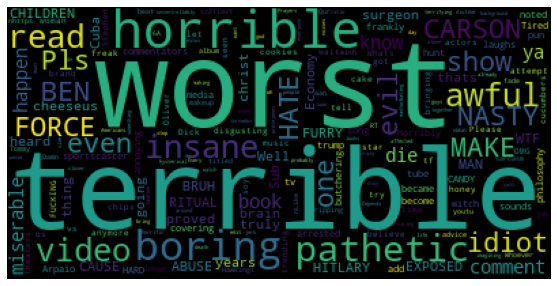

In [30]:
# Performing the sentiment analysis on negative comment_text.

wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig('Negative_comment.Png', dpi=300)

#### converting the Positive comment-text into `str`

In [32]:
total_comments2 = ' '.join(comments_positive['comment_text'])